# Predict the Sale Price of a Property

### W207 Final Project
#### Surya Gutta, Ian Anderson, Allison Godfrey, and Jackie Ma

### 1. Problem Statement

We will be using machine learning approaches to try to most accurately predict home price based on relevant features. The goal of this notebook is to fully understand the data, extract the most relevant features, and apply different machine learning models with various regularization strengths to assess the accuracies, evaluate and compare the errors, and choose the best model accordingly. 

The components of our notebook are as follows: 
1. Exploratory Data Analysis 
2. Data Cleaning 
3. Feature Engineering
4. Encoding Categorical Features
5. Outlier Analysis
6. Machine Learning Models and Assessment

https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
 

### 2. Exploratory Data Analysis (EDA)

In [366]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle
import xgboost as xgb
#Set default matplotlib style to seaborn
mpl.style.use('seaborn-darkgrid')
base_color='#436BAD'
red_color='#990000'
import warnings
warnings.filterwarnings('ignore')

In [367]:
np.random.seed(0)
# Load Data
pd.options.display.width=None
pd.options.display.max_columns = None
#Train data
train = pd.read_csv('./house-prices-data/train.csv',index_col=0)

#Test data
test = pd.read_csv('./house-prices-data/test.csv',index_col=0)

In [368]:
# Train data size
print(train.shape)

(1460, 80)


In [369]:
#Sample Train data
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [370]:
# Test data size
print(test.shape)

(1459, 79)


In [371]:
#Sample Test data
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### 2.1 Missing Values            

              Count  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageType       81     5.55
GarageYrBlt      81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
GarageCond       81     5.55
BsmtExposure     38     2.60
BsmtFinType2     38     2.60
BsmtFinType1     37     2.53
BsmtCond         37     2.53
BsmtQual         37     2.53
MasVnrArea        8     0.55
MasVnrType        8     0.55
Electrical        1     0.07


Text(0.5, 1.0, 'Missing Values - Percentage')

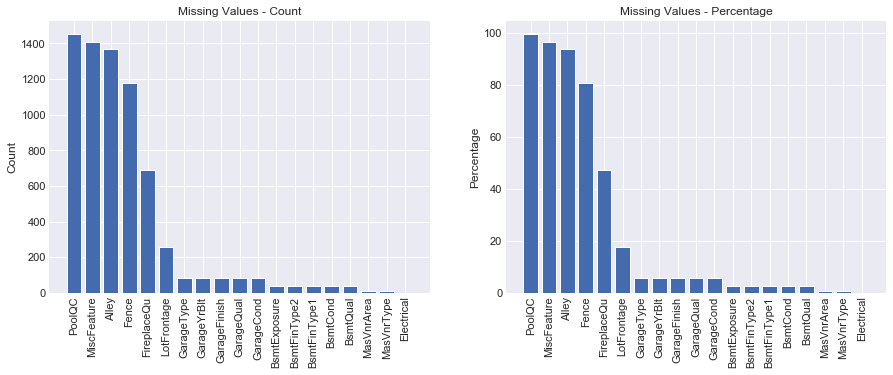

In [372]:
# Analyze on missing data
# Missing values
train_missing = train.isnull().sum()
train_missing = pd.DataFrame(train_missing[train_missing > 0])
train_missing.columns = ['Count']
train_missing.sort_values(by='Count', ascending = False, inplace=True)
train_missing['Percent'] = round((train_missing['Count'] /  len(train.index))* 100, 2) 
plt.figure(figsize=(15, 5))   
plt.subplot(1,2, 1)
print(train_missing)
plt.bar(train_missing.index,train_missing['Count'],color=base_color)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Missing Values - Count')
plt.subplot(1,2, 2)
plt.bar(train_missing.index,train_missing['Percent'],color=base_color)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Missing Values - Percentage')

#### 2.2  Feature Selection

(Jacky): Select 25 features and apply L1 analysys.

#### 2.2.1  Update Data

In [373]:
train_new= train.copy(deep=True)
test_new= test.copy(deep=True)
# Change MSSubClass and MoSold from an int to string since the integer
# value doesn't actually represent a number, but rather a category (month and dwelling type)
train_new.MSSubClass = train_new.MSSubClass.astype('str')
train_new.MoSold = train_new.MoSold.astype('str')

# Numerical and Categorical (type=object) columns/features
numerical_cols = train_new.select_dtypes(exclude=['object'])
categorical_cols = train_new.select_dtypes(include=['object'])

print('Numeric columns info')
print('Total:', len(numerical_cols.columns))
print('Column Names:', numerical_cols.columns)
print('\n')
print('Categorical columns info')
print('Total:', len(categorical_cols.columns))
print('Column Names:', categorical_cols.columns)
#fill missing object values with NA
for col in list(categorical_cols.columns):
    train_new[col].fillna('NA', inplace=True)  
    if (col != 'SalePrice'):
        test_new[col].fillna('NA', inplace=True)
    
#fill missing numerical values with 0
for col in list(numerical_cols.columns):
    train_new[col].fillna(0, inplace=True)
    if (col != 'SalePrice'):
        test_new[col].fillna(0, inplace=True)

#Re-initialize the columns with updated data
numerical_cols = train_new.select_dtypes(exclude=['object'])
categorical_cols = train_new.select_dtypes(include=['object'])

Numeric columns info
Total: 35
Column Names: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')


Categorical columns info
Total: 45
Column Names: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual',

In [374]:
# simplify features
def simplify_features(data):
    data['has_pool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    data['has_basement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    data['has_fireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    data['has_garage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    data['has_2ndflr'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

    data['total_sf'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['total_baths'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])
    data['YrBltAndRemod']=data['YearBuilt']+data['YearRemodAdd']
    data['Total_porch_sf'] = data['OpenPorchSF']+data['3SsnPorch']+data['EnclosedPorch']+data['ScreenPorch']+data['WoodDeckSF']
                                                                                                
simplify_features(train_new)
simplify_features(test_new)

In [375]:
train_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_pool,has_basement,has_fireplace,has_garage,has_2ndflr,total_sf,total_baths,YrBltAndRemod,Total_porch_sf
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,0,1,0,1,1,2416,3.5,4006,61
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,0,1,1,1,0,2240,2.5,3952,298
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,0,1,1,1,1,2272,3.5,4003,42
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,0,1,1,1,1,1933,2.0,3885,307
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,0,1,1,1,1,2853,3.5,4000,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,175000,0,1,1,1,1,1647,2.5,3999,40
1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000,0,1,1,1,0,3026,3.0,3966,349
1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,

#### 2.2.2  Clean Categorical Data

The housing data set we are working with, unsurprisingly, includes data that is not numerical. The non-numerical data can be further classified into two types: ordinal or categorical. Ordinal data are categories which represent specific relative quantities such as low, medium, or high. Categorical data is simply a feature of a home such as roofing material or neighborhood. The categorical value does not in and of itself provide any insight into how it relates to other values in the same category. This distinction is important to consider for how we process these non-numeric columns. The ordinal data will be manually reassigned values in order to preserve the significance of the underlying value while hot encoding will be used to break the categories down into binary representations.

In [376]:
def convert_ordinals(data):
    default_odinal = {
        'Ex': 5,  # Excellent
        'Gd': 4,  # Good
        'TA': 3,  # Average/Typical
        'Fa': 2,  # Fair
        'Po': 1,  # Poor
    }

    # LotShape: General shape of property
    lot_shape = {
        'Reg': 4,  # Regular
        'IR1': 3,  # Slightly irregular
        'IR2': 2,  # Moderately Irregular
        'IR3': 1   # Irregular
    }
    data.LotShape = data.LotShape.map(lot_shape)

    # Utilities: Type of utilities available
    utilities = {
        'AllPub': 4, # All public Utilities (E,G,W,& S)
        'NoSewr': 3, # Electricity, Gas, and Water (Septic Tank)
        'NoSeWa': 2, # Electricity and Gas Only
        'ELO':    1  # Electricity only
    }
    data.Utilities = data.Utilities.map(utilities)

    # LandSlope: Slope of property
    land_slope = {
        'Gtl': 3,  # Gentle slope
        'Mod': 2,  # Moderate Slope
        'Sev': 1   # Severe Slope
    }
    data.LandSlope = data.LandSlope.map(land_slope)

    # ExterQual: Evaluates the quality of the material on the exterior 
    extern_qual = default_odinal
    data.ExterQual = data.ExterQual.map(extern_qual)

    # ExterCond: Evaluates the present condition of the material on the exterior
    extern_cond = default_odinal
    data.ExterCond = data.ExterCond.map(extern_cond)

    # BsmtCond: Evaluates the general condition of the basement
    bsmt_cond = {
        'Ex': 5,  # Excellent
        'Gd': 4,  # Good
        'TA': 3,  # Typical - slight dampness allowed
        'Fa': 2,  # Fair - dampness or some cracking or settling
        'Po': 1,  # Poor - Severe cracking, settling, or wetness
        'NA': 0   # No Basement
    }
    data.BsmtCond = data.BsmtCond.map(bsmt_cond)

    # BsmtExposure: Refers to walkout or garden level walls
    bsmt_exposure = {
        'Gd': 4,  # Good Exposure
        'Av': 3,  # Average Exposure (split levels or foyers typically score average or above)  
        'Mn': 2,  # Mimimum Exposure
        'No': 1,  # No Exposure
        'NA': 0   # No Basement
    }
    data.BsmtExposure = data.BsmtExposure.map(bsmt_exposure)

    # BsmtFinType1: Rating of basement finished area
    bsmt_fin_type1 = {
        'GLQ': 6,  # Good Living Quarters
        'ALQ': 5,  # Average Living Quarters
        'BLQ': 4,  # Below Average Living Quarters
        'Rec': 3,  # Average Rec Room
        'LwQ': 2,  # Low Quality
        'Unf': 1,  # Unfinshed
        'NA':  0   # No Basement
    }
    data.BsmtFinType1 = data.BsmtFinType1.map(bsmt_fin_type1)

    # BsmtFinType2: Rating of basement finished area (if multiple types)
    bsmt_fin_type2 = bsmt_fin_type1
    data.BsmtFinType2 = data.BsmtFinType2.map(bsmt_fin_type2)

    # HeatingQC: Heating quality and condition
    heating_qc = default_odinal
    data.HeatingQC = data.HeatingQC.map(heating_qc)

    # CentralAir: Central air conditioning
    central_air = {
        'N': 0,  # No
        'Y': 1   # Yes
    }
    data.CentralAir = data.CentralAir.map(central_air)

    # KitchenQual: Kitchen quality
    kitchen_qual = default_odinal
    data.KitchenQual = data.KitchenQual.map(kitchen_qual)

    # Functional: Home functionality (Assume typical unless deductions are warranted)
    functional = {
        'Typ':  8,  # Typical Functionality
        'Min1': 7,  # Minor Deductions 1
        'Min2': 6,  # Minor Deductions 2
        'Mod':  5,  # Moderate Deductions
        'Maj1': 4,  # Major Deductions 1
        'Maj2': 3,  # Major Deductions 2
        'Sev':  2,  # Severely Damaged
        'Sal':  1   # Salvage only
    }
    data.Functional = data.Functional.map(functional)

    # GarageFinish: Interior finish of the garage
    garage_finish = {
        'Fin': 3,  # Finished
        'RFn': 2,  # Rough Finished
        'Unf': 1,  # Unfinished
        'NA':  0   # No Garage
    }
    data.GarageFinish = data.GarageFinish.map(garage_finish)

    # GarageQual: Garage quality
    garage_qual = default_odinal
    data.GarageQual = data.GarageQual.map(garage_qual)

    # GarageCond: Garage condition
    garage_cond = default_odinal
    data.GarageCond = data.GarageCond.map(garage_cond)

    # PavedDrive: Paved driveway
    paved_drive = {
        'Y': 3,  # Paved 
        'P': 2,  # Partial Pavement
        'N': 1   # Dirt/Gravel
    }
    data.PavedDrive = data.PavedDrive.map(paved_drive)
    
convert_ordinals(train_new)
convert_ordinals(test_new)

In [377]:
train_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_pool,has_basement,has_fireplace,has_garage,has_2ndflr,total_sf,total_baths,YrBltAndRemod,Total_porch_sf
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,4,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,NA,Attchd,2003.0,2,2,548,3.0,3.0,3,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,0,1,0,1,1,2416,3.5,4006,61
2,20,RL,80.0,9600,Pave,NA,4,Lvl,4,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,Gd,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,TA,Attchd,1976.0,2,2,460,3.0,3.0,3,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,0,1,1,1,0,2240,2.5,3952,298
3,60,RL,68.0,11250,Pave,NA,3,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,TA,Attchd,2001.0,2,2,608,3.0,3.0,3,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,0,1,1,1,1,2272,3.5,4003,42
4,70,RL,60.0,9550,Pave,NA,3,Lvl,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,TA,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,Gd,Detchd,1998.0,1,3,642,3.0,3.0,3,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,0,1,1,1,1,1933,2.0,3885,307
5,60,RL,84.0,14260,Pave,NA,3,Lvl,4,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,TA,Attchd,2000.0,2,3,836,3.0,3.0,3,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,0,1,1,1,1,2853,3.5,4000,276


In [378]:
def hot_encode(data):
    categorical_cols = data.select_dtypes(include=['object'])
    return pd.get_dummies(data, columns = categorical_cols.columns)

test_new = hot_encode(test_new)
train_new = hot_encode(train_new)
train_new.head()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,has_pool,has_basement,has_fireplace,has_garage,has_2ndflr,total_sf,total_baths,YrBltAndRemod,Total_porch_sf,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_Con

#### 2.2.3  Features with Highest Correlation with Sales Price

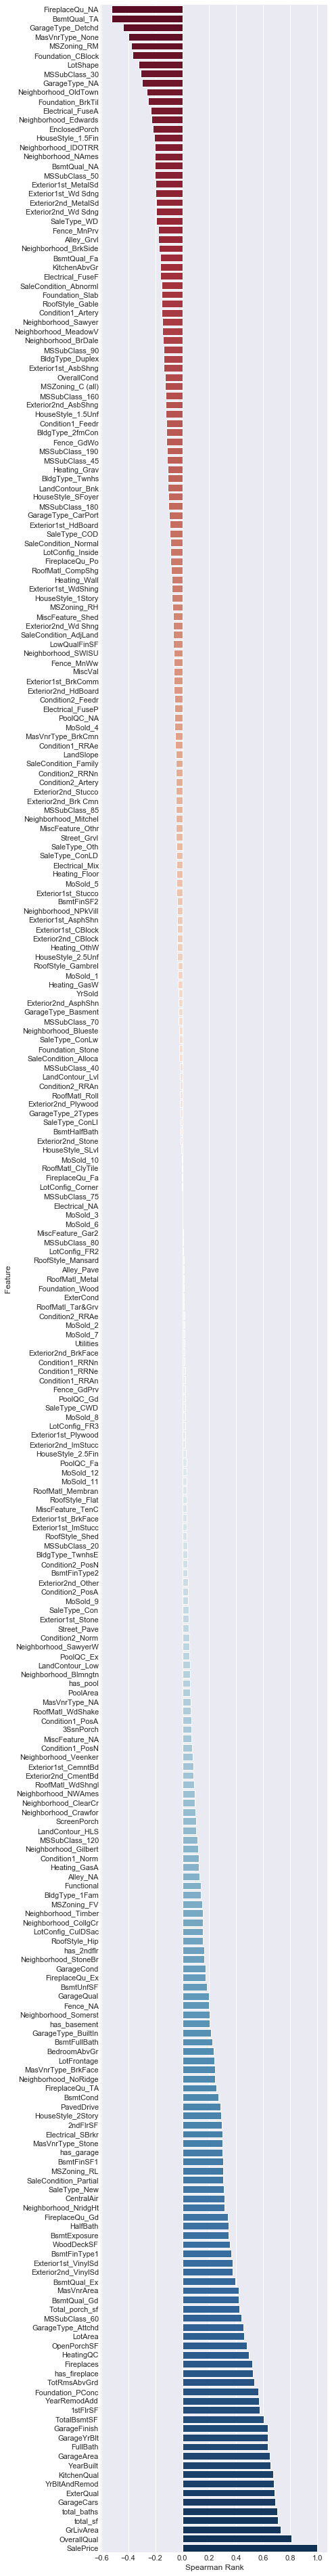

In [379]:
# Spearman's Rank
spearman_rank = pd.DataFrame()
spearman_rank['Feature'] = train_new.columns
spearman_rank['Spearman Rank'] = [train_new[f].corr(train_new['SalePrice'], 'spearman') for f in train_new.columns]
spearman_rank = spearman_rank.sort_values('Spearman Rank')
    
plt.figure(figsize=(6, 0.25*len(train_new.columns)))
sns.barplot(data=spearman_rank, y='Feature', x='Spearman Rank', orient='h', palette="RdBu")

**TODO:** Do some analysis/write notes on Negative and Positive correlated features

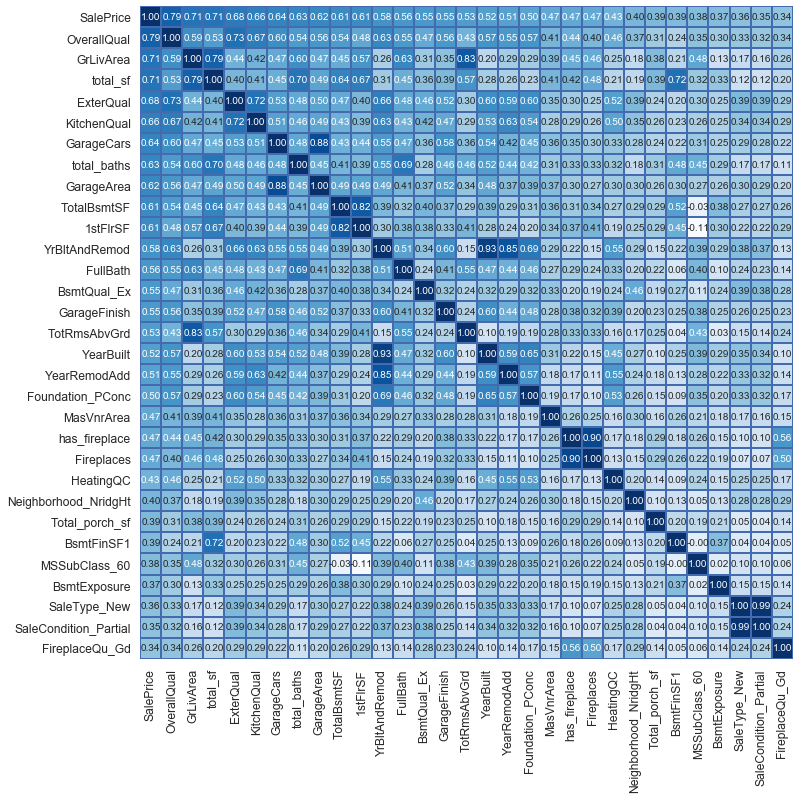

In [380]:
# Heat Map for largest 25 features
corr_matrix = train_new.corr()
high_corr_cols = corr_matrix.nlargest(31, 'SalePrice')['SalePrice'].index # Add 1 as it includes SalePrice
cm = np.corrcoef(train_new[high_corr_cols].values.T)
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(cm,annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=high_corr_cols.values, 
                 xticklabels=high_corr_cols.values, ax = ax, cmap="Blues", linewidths=1, 
                 linecolor=base_color, cbar=False)
plt.show()

Todo: Based on Heat Map and Spearman's Rank...... analysis

#### 2.3 Distributions

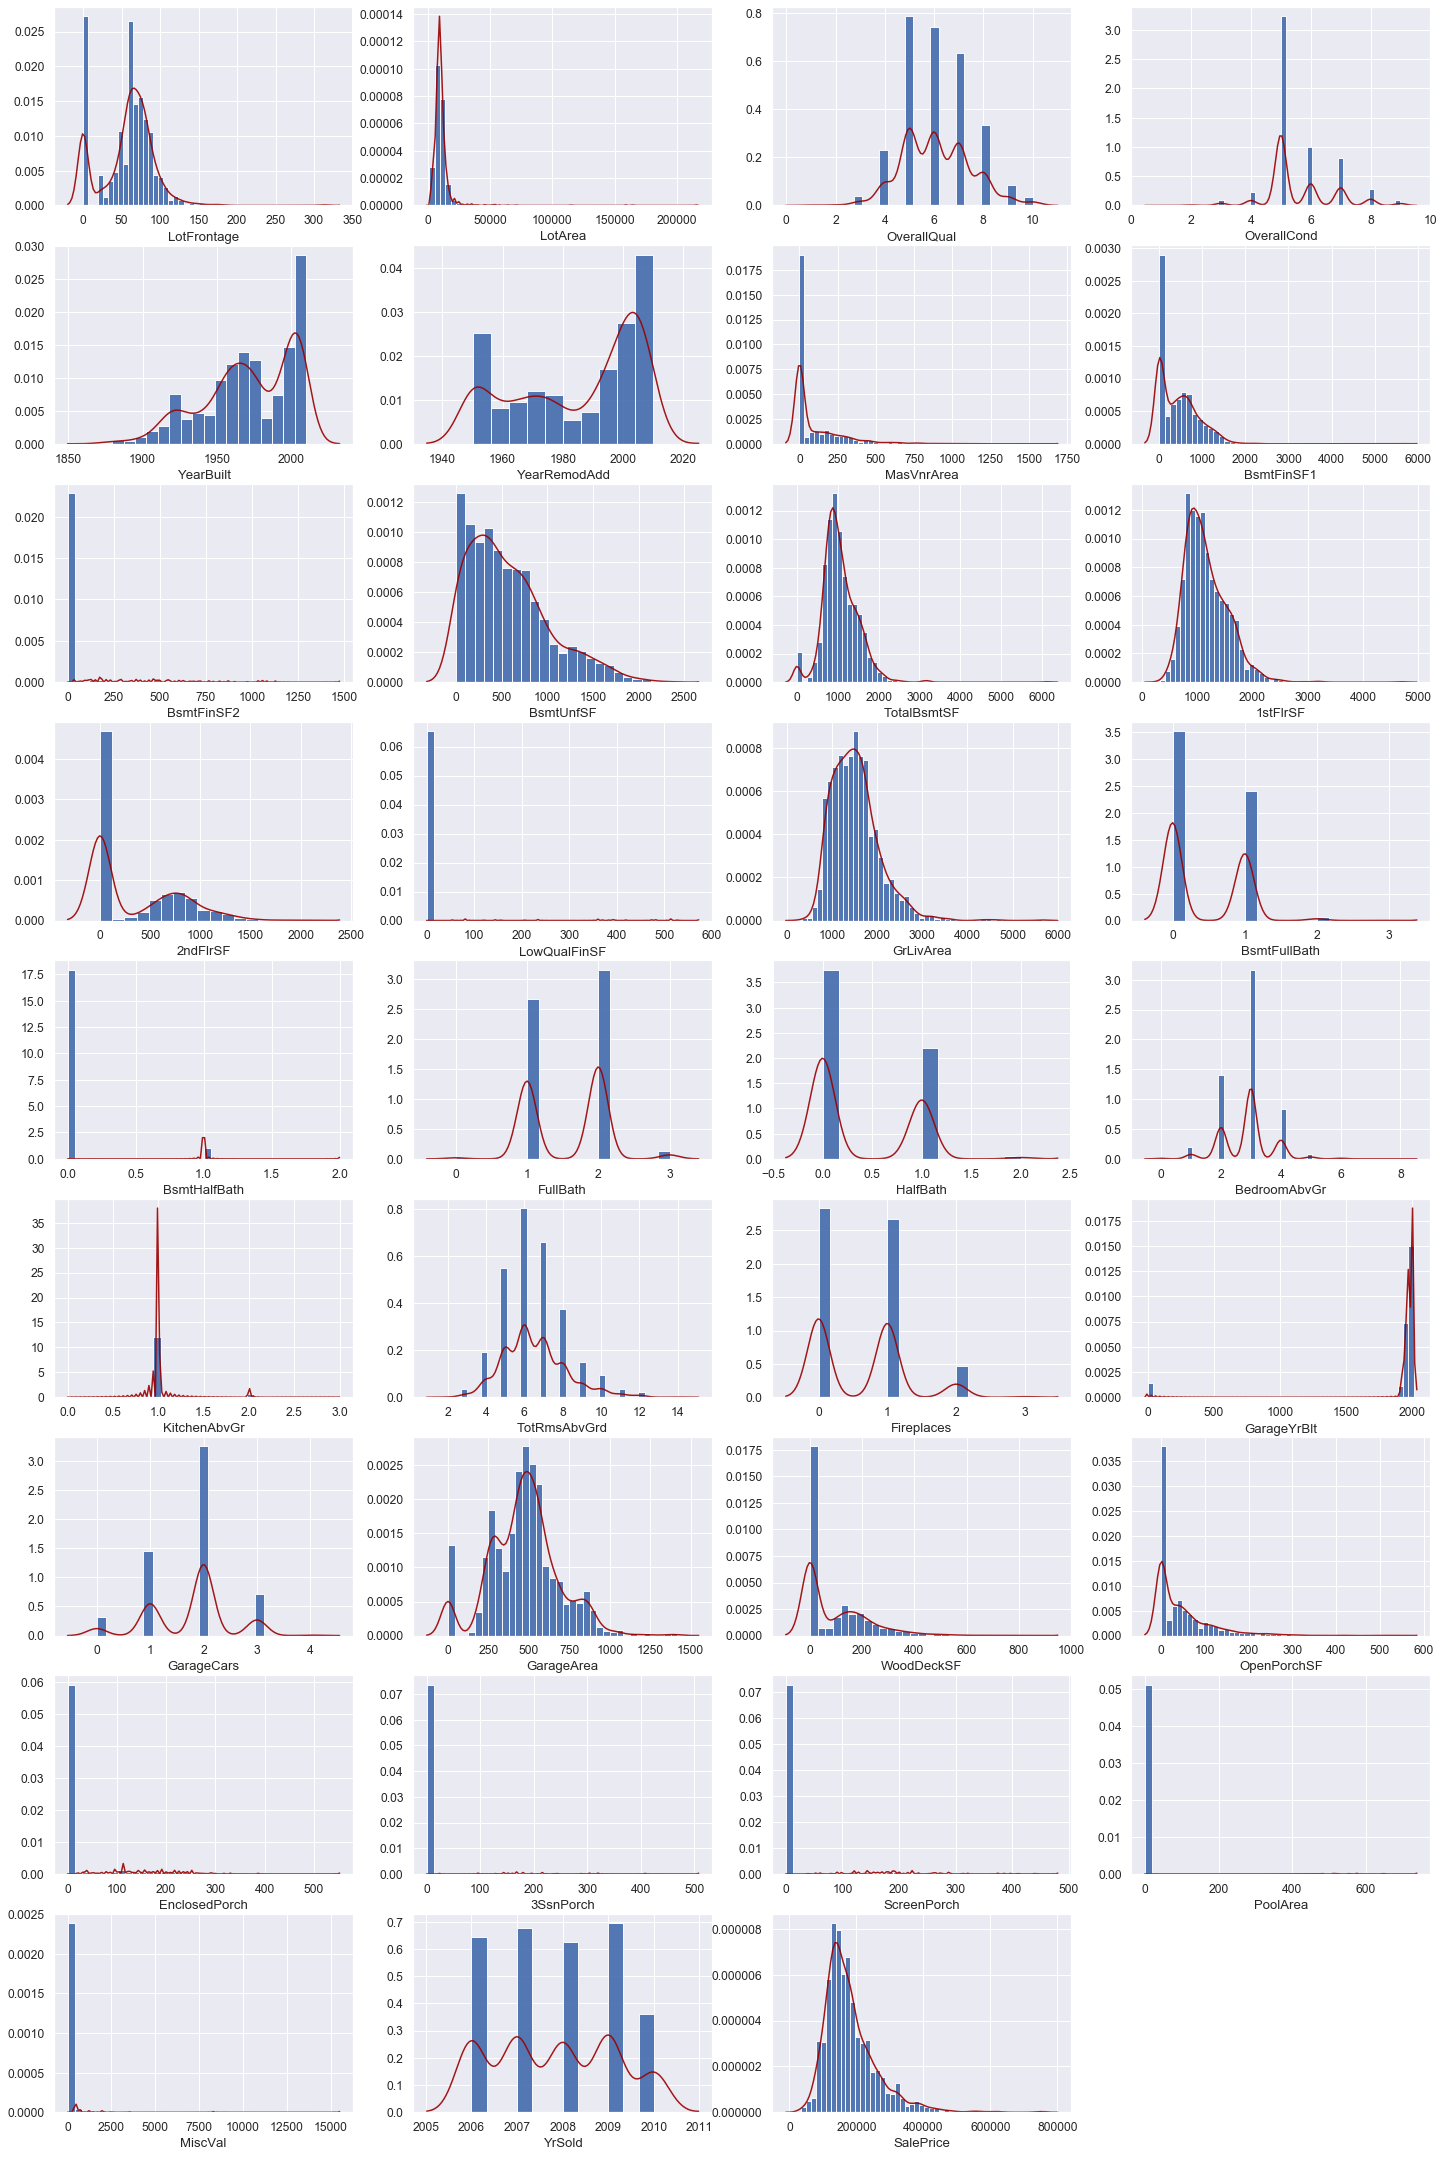

In [381]:
# Show the distribution plots for numerical features.
fig, axes = plt.subplots(figsize=(20,30))
fig.tight_layout()
cell_no = 1
for column_name in numerical_cols.columns:     
    plt.subplot(9, 4, cell_no)
    sns.distplot(numerical_cols[column_name], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9},label=column_name)
    cell_no+=1

TODO: Provide analysis (Surya)

#### 2.4 Analysis on 'Sale Price' (Outcome / Dependent / Target) variable

Text(0.5, 1.0, 'Probability Plot')

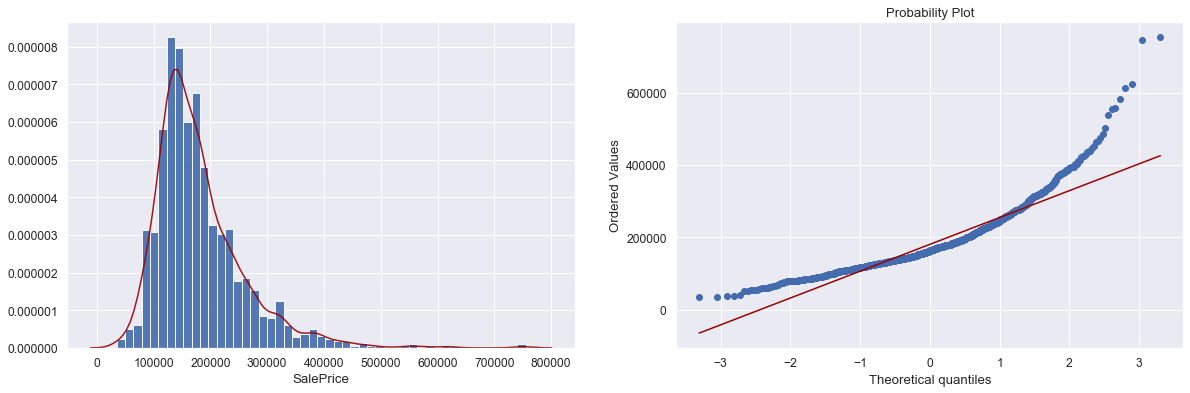

In [382]:
# Plot the Sale Price distribution
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
sns.distplot(train_new['SalePrice'], hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9});
ax2 = fig.add_subplot(122)
plt.title("Distribution")
stats.probplot(train['SalePrice'], plot=ax2);
ax2.get_lines()[0].set_color(base_color)
ax2.get_lines()[1].set_color(red_color)
plt.title("Probability Plot")

TODO: Provide analysys on right skewed distribution. 

Text(0.5, 1.0, 'Probability after Log transformation')

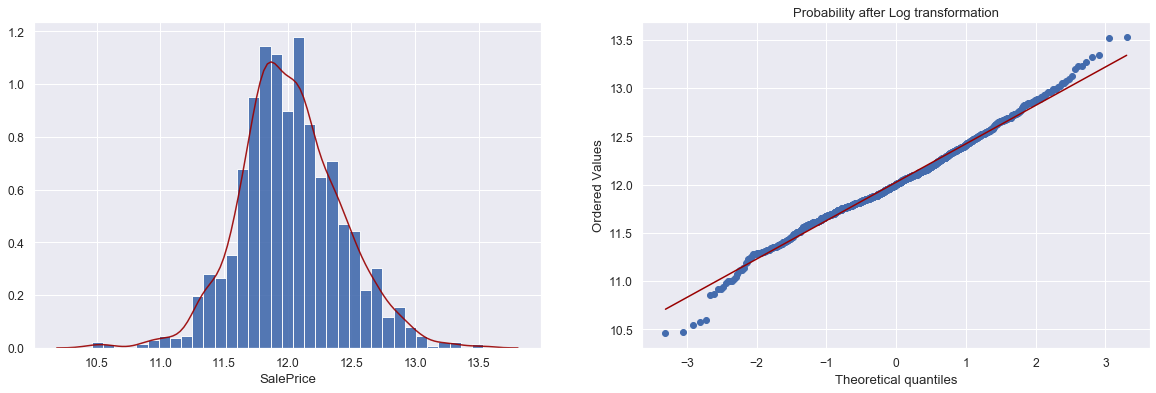

In [383]:
#Apply log transformation to SalePrice Outcome variable
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(121)
sns.distplot(np.log(train_new['SalePrice']),   hist=True, kde=True, 
                 hist_kws = {'color':base_color, 'alpha':0.9},  
                 kde_kws = {'color':red_color, 'alpha':0.9})

ax2 = fig.add_subplot(122)
plt.title("Distribution after Log transformation")
stats.probplot(np.log(train_new['SalePrice']), plot=ax2);
ax2.get_lines()[0].set_color(base_color)
ax2.get_lines()[1].set_color(red_color)
plt.title("Probability after Log transformation")

TODO: Provide analysys on normal distribution after log transformation. 

#### 2.5    Target feature ('Sales Price') and Predictors

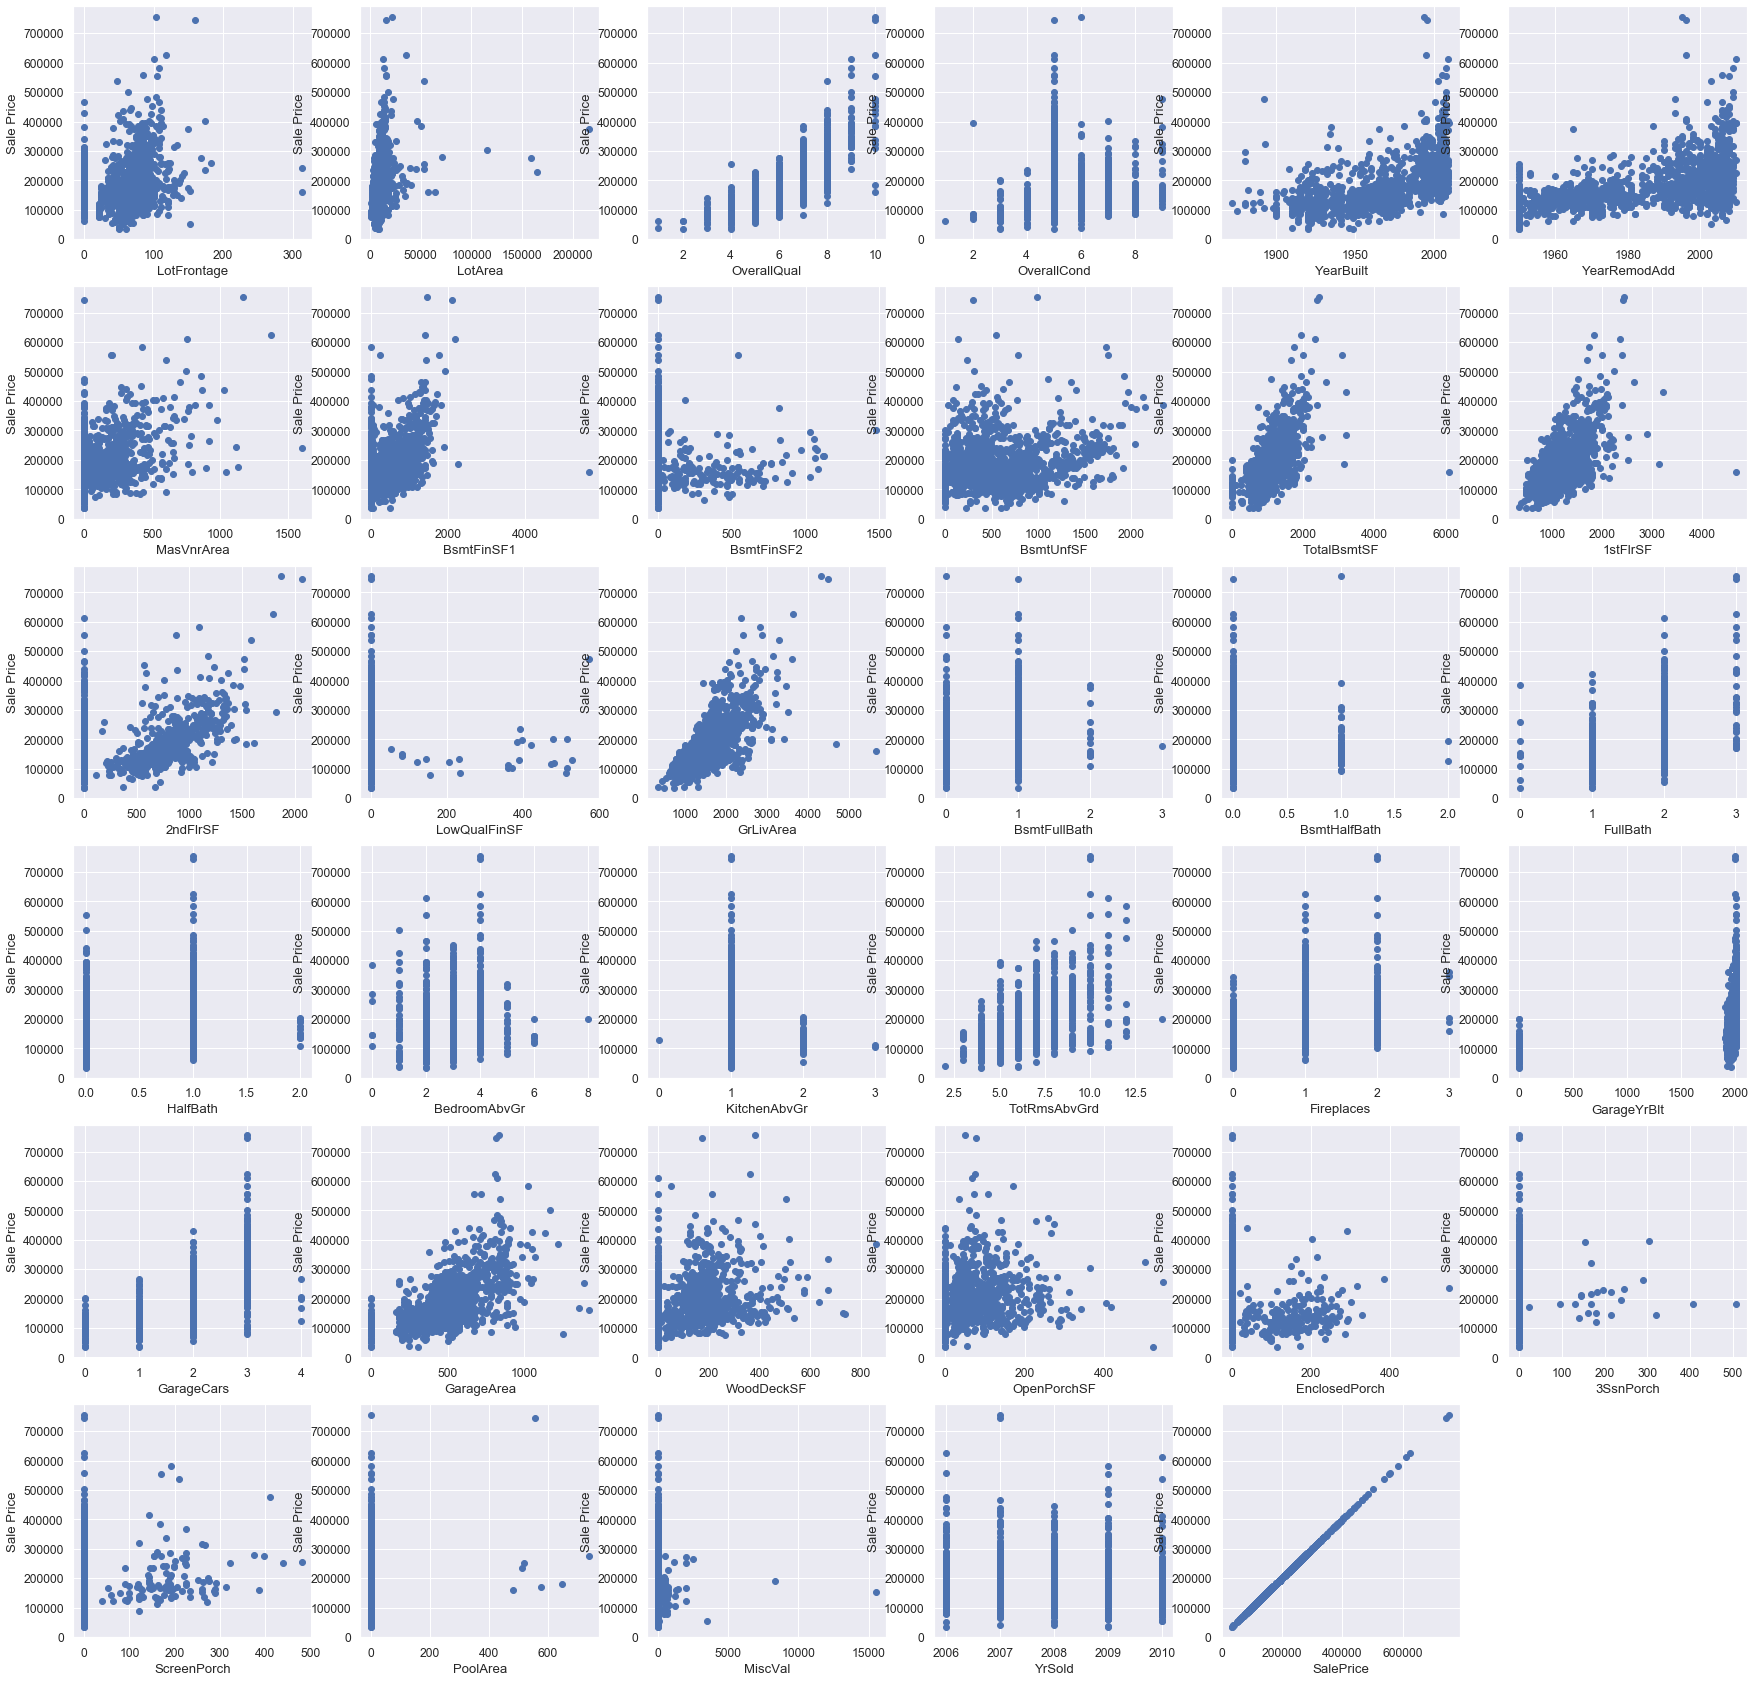

In [384]:
plt.figure(figsize=(30, 30))

n = 1
for col in numerical_cols.columns:  
    scatter = plt.subplot(6, 6, n)
    plt.scatter(train_new[col], train_new["SalePrice"], color = 'b')
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    n+=1
plt.show()

TODO: Analysys

#### 2.6 Exclude columns

In [385]:
# From section 2.1 there are 6 features above 10% NA. Let us drop them. Most of them are above 50% NA
excluded_columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage']
# Surya: The above columns got changed after the hot encode. We need to use the updated column names for exclusion.
# After that, uncomment the following

# train_new= train_new.drop(excluded_columns, axis=1)
# test_new= test_new.drop(excluded_columns ,axis=1)

#### 2.7   Exclude Outliers

In [386]:
#TODO: For the selected features, drop the Outliers with certain conditions.
# (Ian) - Summary statistics and box plots
display(numerical_cols.describe().transpose())


,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


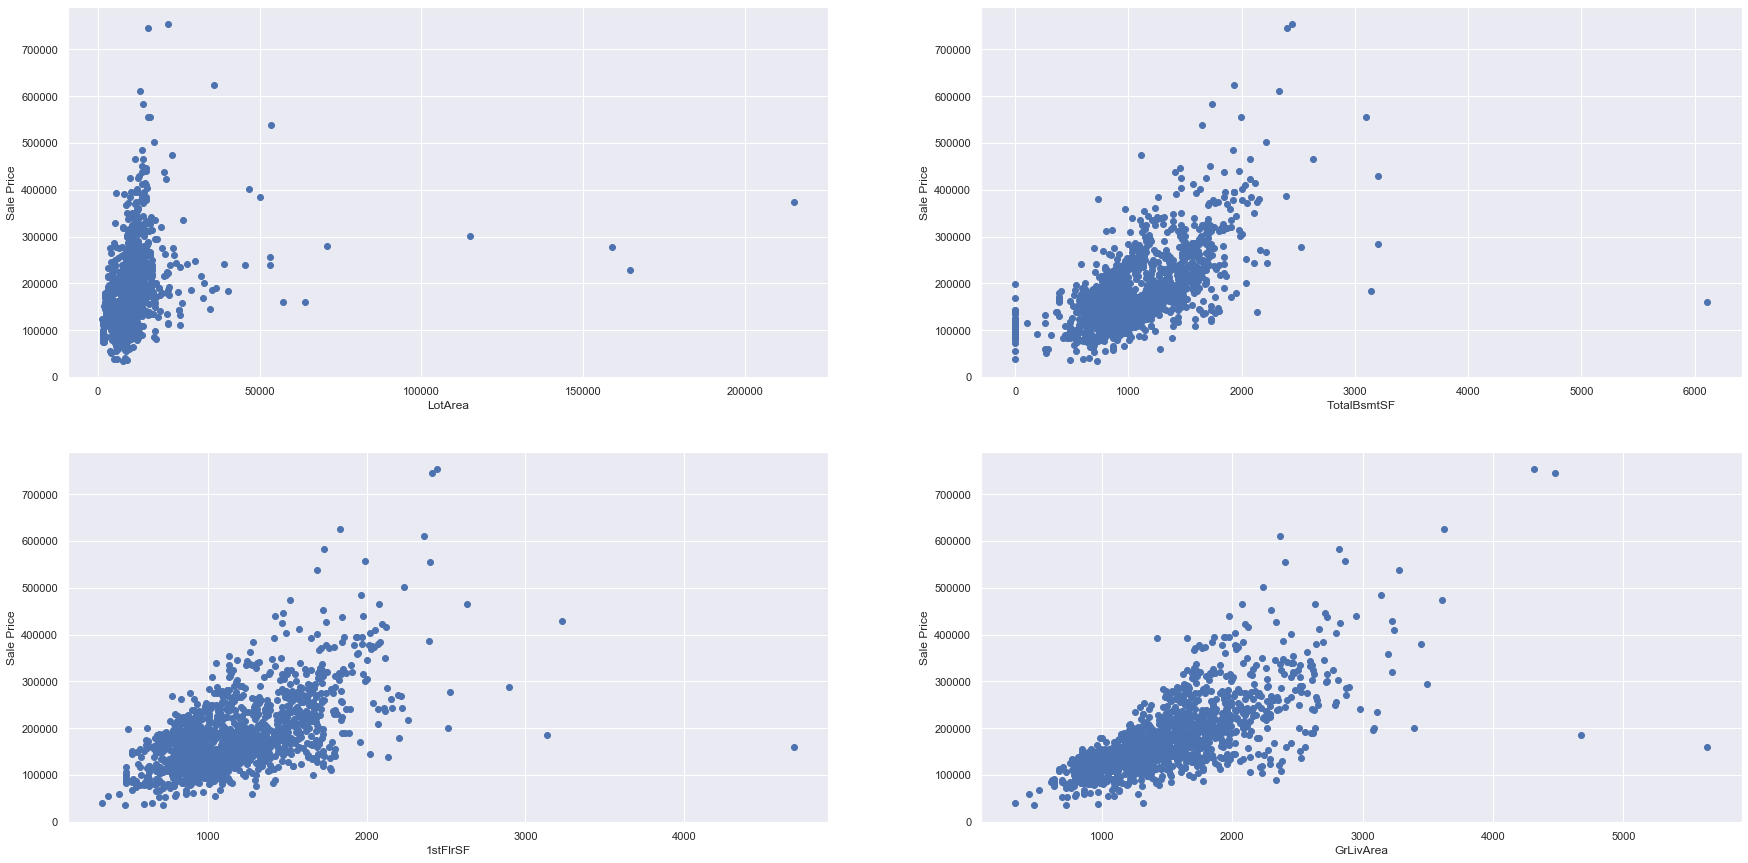

In [387]:
def outlier_plots(data):
    plt.figure(figsize=(30, 15))
    sns.set(font_scale=1)
    outlier_columns = [
        'LotArea',
        'TotalBsmtSF',
        '1stFlrSF',
        'GrLivArea'
    ]

    n = 1
    for col in outlier_columns:  
        scatter = plt.subplot(2, 2, n)
        plt.scatter(data[col], data["SalePrice"], color = 'b')
        plt.xlabel(col)
        plt.ylabel("Sale Price")
        n+=1
    plt.show()

# print the plots that showed outliers
outlier_plots(train_new)

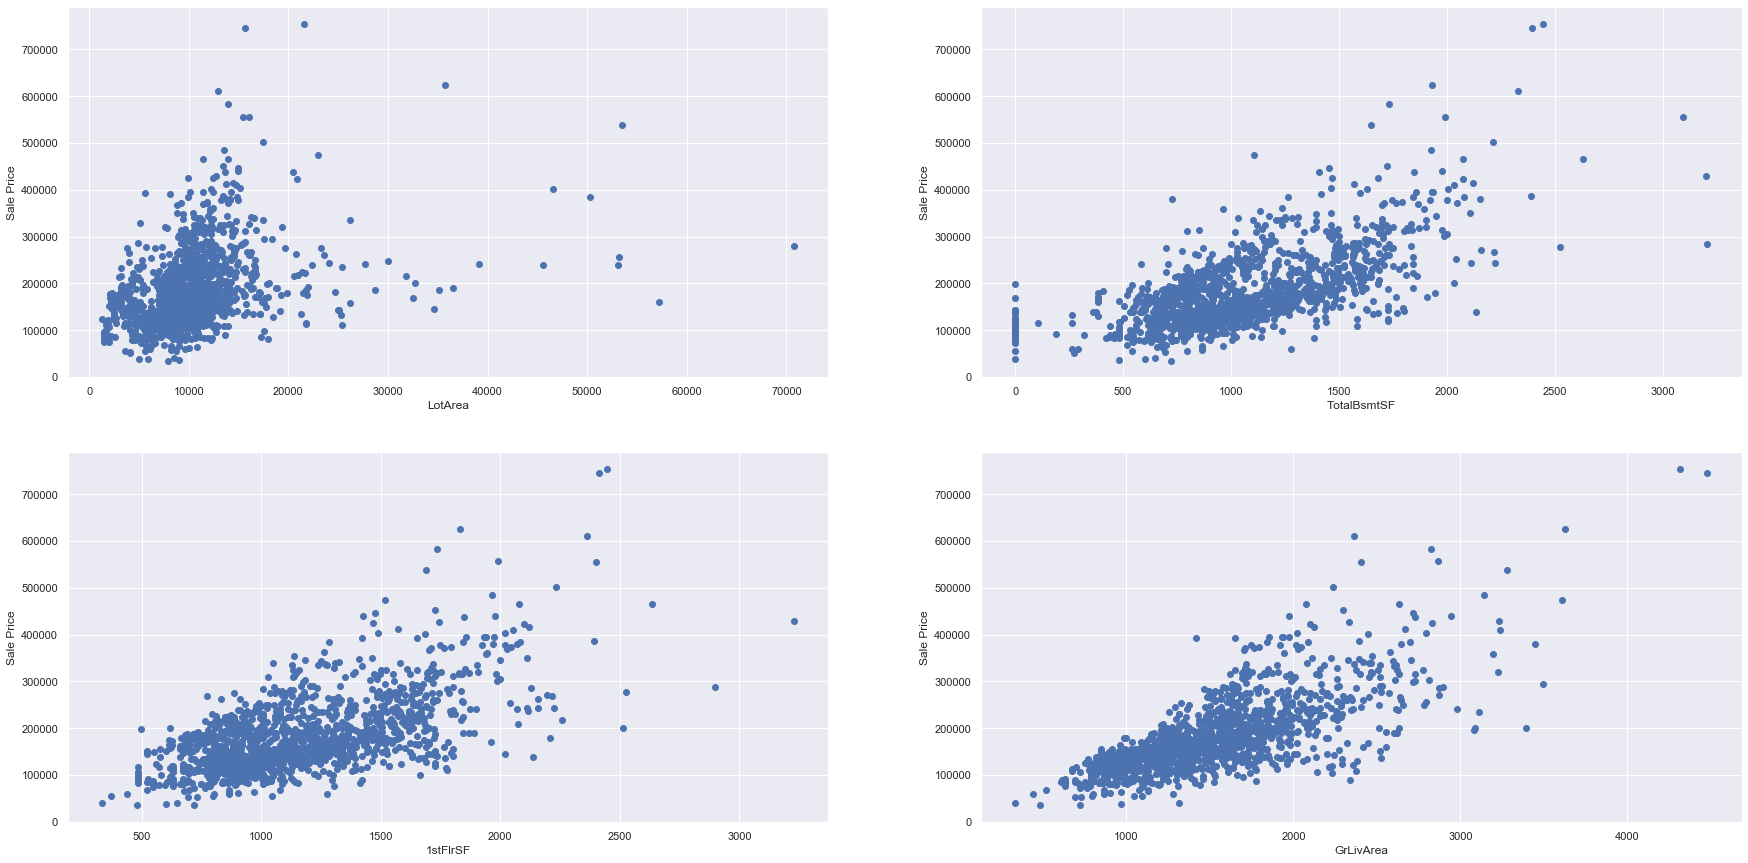

In [388]:
# remove identified outliers
train_new = train_new.drop(train_new[(train_new.GrLivArea>4000) & (train_new.SalePrice<200000)].index)
train_new = train_new.drop(train_new[(train_new.LotArea>100000)].index)

train_new=train_new.fillna(0)
# re-examine the plots
outlier_plots(train_new)

#### 2.8  Create Dev data

In [389]:
# TODO Split the Train Data into Train(80%) and Dev Data (20%) for model building
# Label will be the SalePrice column data. We can even randamize the initial 80% split if possible.

#Output should be train_data, train_labels, dev_data, dev_labels. No change to test_data. 
# (Jacky)

temp = train_new
temp = shuffle(temp)
temp.reset_index(inplace=True, drop=True)
temp_data = temp.drop(columns="SalePrice")
temp_labels = temp.SalePrice

num_test = int(len(temp_data)*0.8)

train_data, train_labels = temp_data[:num_test], temp_labels[:num_test]
dev_data, dev_labels = temp_data[num_test:], temp_labels[num_test:]

log_dev_labels = np.log(dev_labels)
log_train_labels = np.log(train_labels)

print(num_test,train_data.shape)

1163 (1163, 276)


In [390]:
train_labels_temp = log_train_labels #np.around(train_labels, decimals = -5)
dev_labels_temp = log_dev_labels #np.around(dev_labels, decimals = -5)

#### 2.9 Choose features

In [391]:
features = [
  'OverallQual',
  'total_sf',
  'GrLivArea',
  'ExterQual',
  'KitchenQual',
  'TotalBsmtSF',
  'GarageCars',
  'total_baths',
  'GarageArea',
  '1stFlrSF',
  'YrBltAndRemod',
  'FullBath',
  'BsmtQual_Ex',
  'GarageFinish',
  'TotRmsAbvGrd',
  'YearBuilt',
  'YearRemodAdd',
  'Foundation_PConc',
  'MasVnrArea',
  'has_fireplace',
  'Fireplaces',
  'HeatingQC',
  'BsmtFinSF1',
  'Neighborhood_NridgHt',
  'Total_porch_sf',
  #'MSSubClass_60', # This is not in test data
  'LotArea',
  'BsmtExposure',
  'SaleType_New',
  'SaleCondition_Partial',
    
]
train_data_temp = train_data[features]
dev_data_temp = dev_data[features]
test_data_temp = test_new[features]
train_data_temp.head()
test_data_temp.head()

,OverallQual,total_sf,GrLivArea,ExterQual,KitchenQual,TotalBsmtSF,GarageCars,total_baths,GarageArea,1stFlrSF,YrBltAndRemod,FullBath,BsmtQual_Ex,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Foundation_PConc,MasVnrArea,has_fireplace,Fireplaces,HeatingQC,BsmtFinSF1,Neighborhood_NridgHt,Total_porch_sf,LotArea,BsmtExposure,SaleType_New,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,5,1508.0,896,3,3.0,882.0,1.0,1.0,730.0,896,3922,1,0,1,5,1961,1961,0,0.0,0,0,3,468.0,0,260,11622,1,0,0
1462,6,2252.0,1329,3,4.0,1329.0,1.0,1.5,312.0,1329,3916,1,0,1,6,1958,1958,0,108.0,0,0,3,923.0,0,429,14267,1,0,0
1463,5,2420.0,1629,3,3.0,928.0,2.0,2.5,482.0,928,3995,2,0,3,6,1997,1998,1,0.0,1,1,4,791.0,0,246,13830,1,0,0
1464,6,2206.0,1604,3,4.0,926.0,2.0,2.5,470.0,926,3996,2,0,3,7,1998,1998,1,20.0,1,1,5,602.0,0,396,9978,1,0,0
1465,8,1543.0,1280,4,4.0,1280.0,2.0,2.0,506.0,1280,3984,2,0,2,5,1992,1992,1,0.0,0,0,5,263.0,0,226,5005,1,0,0


### 3. Model building

First we'll make our predictions easy by identifying any test data that was leaked into train

In [392]:
train_temp = train
test_temp = test

test_temp['copy_index'] = test_temp.index

comparison_df = test_temp.merge(train_temp, indicator=True)
dups = comparison_df[comparison_df['_merge'] == 'both']
dups

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,copy_index,SalePrice,_merge
0,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,520,623,80,1223,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,2714,147400,both
1,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,2866,130000,both


Looks like there were two duplicate rows between test and train. We'll add a function to patch our prediction with the actual values.

In [393]:
def patch_leaked_test(data):
    data.loc[2714]['SalePrice'] = 147400
    data.loc[2866]['SalePrice'] = 130000

Print the sizes

In [394]:
# Train data size
print(train_data_temp.shape)

# Dev data size
print(dev_data_temp.shape)

# Test data size
print(test_data_temp.shape)

(1163, 29)
(291, 29)
(1459, 29)


In [395]:
# substituting with the majority class('TA' which has ordinal 3)
test_data_temp['KitchenQual'].fillna(3, inplace = True) 

 ##### L1 Analysus

TODO: Run each model with different L1 values

In [396]:
# np.random.seed(0)


# train_labels_bin = np.around(train_labels, decimals = -5)
# lr_l1 = LogisticRegression(C=0.5,penalty="l1",solver="liblinear", multi_class="auto",tol=0.2)
# lr_l1.fit(train_data,train_labels_temp)

# l1_coef = []
# for i in range(lr_l1.coef_.shape[1]):
#             for j in range(lr_l1.coef_.shape[0]):
#                 if lr_l1.coef_[j][i] != 0:
#                     l1_coef.append(i)
#                     break
# # l1_feature = np.array(train_data[1])[l1_coef]
# print(lr_l1.coef_.shape)

#### 3.1 Logistic Regression      

In [397]:
# def logit(c_values):
    

#     for c in c_values:
#         lr = LogisticRegression(C=c, solver="liblinear", multi_class="auto")
#         lr.fit(train_data_temp,train_labels_temp)

#         predict = lr.predict(dev_data_temp)
#         mse = np.sqrt(mean_squared_log_error(dev_labels_temp, predict))
#         print(f'c: {c:5}  mean squared log error: {mse:.5f}')


# c_values = [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10]
# logit(c_values)

In [398]:
# TODO

#### 3.2 Regression Models

In [399]:
# build multiple models to preform regression analysis

br_model   = linear_model.BayesianRidge()
ll_model   = linear_model.LassoLars()
ardr_model = linear_model.ARDRegression()
par_model  = linear_model.PassiveAggressiveRegressor()
trs_model  = linear_model.TheilSenRegressor()
lr_model   = linear_model.LinearRegression()
rfr_model   = RandomForestRegressor(n_estimators=300, max_depth=16)
xgbr_model   = XGBRegressor(learning_rate=0.08, n_estimators=300)

In [400]:
# fit models using training data
br_model_fit   = br_model.fit(train_data_temp, train_labels_temp)
ll_model_fit   = ll_model.fit(train_data_temp, train_labels_temp)
ardr_model_fit = ardr_model.fit(train_data_temp, train_labels_temp)
par_model_fit  = par_model.fit(train_data_temp, train_labels_temp)
trs_model_fit  = trs_model.fit(train_data_temp, train_labels_temp)
lr_model_fit   = lr_model.fit(train_data_temp, train_labels_temp)
rfr_model_fit  = rfr_model.fit(train_data_temp, train_labels_temp)
xgbr_model_fit   = xgbr_model.fit(train_data_temp, train_labels_temp)

# create a dictionary to store our models with weights to be used for blending
regression_models = [
    {'name': 'BayesianRidge', 'weight': 0.09, 'model': br_model_fit},    
    {'name': 'LinearRegression', 'weight': 0.45, 'model': lr_model_fit},
    {'name': 'XGBoost', 'weight': 0.45, 'model': lr_model_fit},
    {'name': 'TheilSenRegressor', 'weight': 0.006, 'model': trs_model_fit},
    {'name': 'RandomForestRegressor', 'weight': 0.001, 'model': rfr_model_fit},    
    {'name': 'ARDRegression', 'weight': 0.001, 'model': ardr_model_fit},
    {'name': 'PassiveAggressiveRegressor', 'weight': 0.001, 'model': par_model_fit},    
    {'name': 'LassoLars', 'weight': 0.001, 'model': ll_model_fit}    
]

for model in regression_models:
    prediction = model['model'].predict(dev_data_temp)
    rmse = np.sqrt(mean_squared_log_error(dev_labels_temp, prediction))
    print(f'Model = {model["name"]:30} RMSE = {rmse:.6f}')

[16:25:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model = BayesianRidge                  RMSE = 0.010283
Model = LinearRegression               RMSE = 0.010283
Model = XGBoost                        RMSE = 0.010283
Model = TheilSenRegressor              RMSE = 0.010395
Model = RandomForestRegressor          RMSE = 0.010868
Model = ARDRegression                  RMSE = 0.013873
Model = PassiveAggressiveRegressor     RMSE = 0.012643
Model = LassoLars                      RMSE = 0.029211


In [401]:
# run a prediction with blended regression models
def blend_models_predict(data):
    predict = []
    for model in regression_models:
        if len(predict) == 0:
            predict = model['weight'] * model['model'].predict(data)
        else:
            predict += model['weight'] * model['model'].predict(data)
    
    return predict


predict = blend_models_predict(dev_data_temp)

rmse = np.sqrt(mean_squared_log_error(dev_labels_temp, predict))
print(f'Blended Model RMSE = {rmse:.5f}')

Blended Model RMSE = 0.01028


In [402]:
# predict home prices using blended regression model
test_predict = blend_models_predict(test_data_temp)

prices = np.exp(test_predict)
predicted = test_data_temp
predicted['SalePrice'] = prices
predicted = predicted[['SalePrice']]

In [403]:
# fix our predictions on leaked data and write to CSV
patch_leaked_test(predicted)
predicted.to_csv(r'./house-prices-data/test_predicted.csv')

#### 3.2 KNN Regression   

In [404]:
# def knn(k_values):
#     #for different training k values, form model and print accuracy
#     for k in k_values:
#         neigh = KNeighborsClassifier(n_neighbors = k)
#         neigh.fit(train_data_temp, train_labels_temp)
#         y_pred = neigh.predict(dev_data_temp)
#         mse = np.sqrt(mean_squared_log_error(dev_labels_temp, y_pred))
#         print(f"mean squared error for k = {k}:\t{mse:.5f}")

# k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
# knn(k_values)

#### 3.3 Random Forest  

In [405]:
n_estimators = [5,10, 25, 50, 75, 100, 150, 200, 250, 300,400,500] 
max_depth = [4,8,16,32,64]
rmse_values = []
rmse_est_depth_values =[]
for ne in n_estimators:
    for md in max_depth:
        rfc = RandomForestRegressor(n_estimators=ne, max_depth=md)
        rfc.fit(train_data_temp, train_labels_temp)
        prediction = rfc.predict(dev_data_temp)
        rmse = np.sqrt(mean_squared_log_error(dev_labels_temp, prediction))
        rmse_values.append(rmse)
        rmse_est_depth_values.append((ne,md))
        #print(f"mean squared error number of trees: {ne} max depth: {md}) is {rmse:.5f}")
min_rmse_index = rmse_values.index(min(rmse_values))
print("Minmum mean squared error achieved is {:.5f} with {} estimators and {} max_depth.".format(min(rmse_values),rmse_est_depth_values[min_rmse_index][0],rmse_est_depth_values[min_rmse_index][1]))

Minmum mean squared error achieved is 0.01087 with 300 estimators and 16 max_depth.


In [406]:
n_estimators = [10, 25, 50, 75, 100, 200, 250, 300, 400, 500, 750, 1000] 
learning_rates = [0.001, 0.005, 0.01, 0.02,0.03,0.04,0.05,0.06,0.07, 0.08,0.09,0.1]
rmse_values = []
rmse_est_depth_values =[]
for ne in n_estimators:
    for lr in learning_rates:
        rfc = XGBRegressor(objective ='reg:squarederror', n_estimators=ne, learning_rate=lr)
        rfc.fit(train_data_temp, train_labels_temp)
        prediction = rfc.predict(dev_data_temp)
        rmse = np.sqrt(mean_squared_log_error(dev_labels_temp, prediction))
        rmse_values.append(rmse)
        rmse_est_depth_values.append((ne,lr))        
min_rmse_index = rmse_values.index(min(rmse_values))
print("Minmum mean squared error achieved is {:.6f} with {} estimators and {} learning_rate.".format(min(rmse_values),rmse_est_depth_values[min_rmse_index][0],rmse_est_depth_values[min_rmse_index][1]))

Minmum mean squared error achieved is 0.010140 with 300 estimators and 0.08 learning_rate.


#### 3.4 Gradient Boosting   

In [103]:
# TODO

#### 3.5 Support Vector Regression 

In [104]:
# TODO This is from Week 8

#### 3.6 XGBoost Regression 

In [105]:
# TODO 

In [106]:
# model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
# model.fit(train_data_temp, train_labels_temp)
# print("F1 for XGB model using 8 features: ", model.score(dev_data_temp, dev_labels_temp))

#### 3.7 Models comparison (RMSE comparison between models)

In [107]:
# TODO We can provide some sort of simple bar chart showing different R squared values of each model.

### 4. Summary

###### TODO

### 5. References

TODO